<a href="https://colab.research.google.com/github/houston03/Machine_learning/blob/main/keras_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential




In [175]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [176]:
class_name = ['Airplanes',
'Cars',
'Birds',
'Cats',
'Deer',
'Dogs',
'Frogs',
'Horses',
'Ships',
'Trucks']

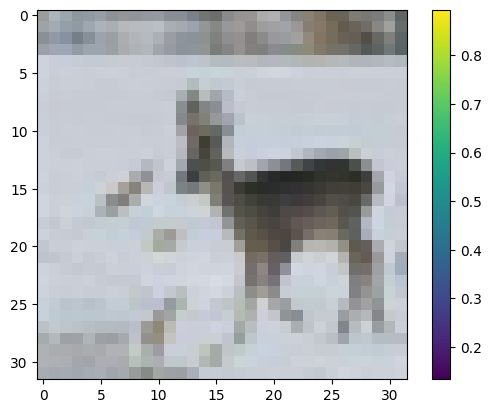

In [179]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)

In [178]:
x_train = x_train / 255
x_test = x_test / 255


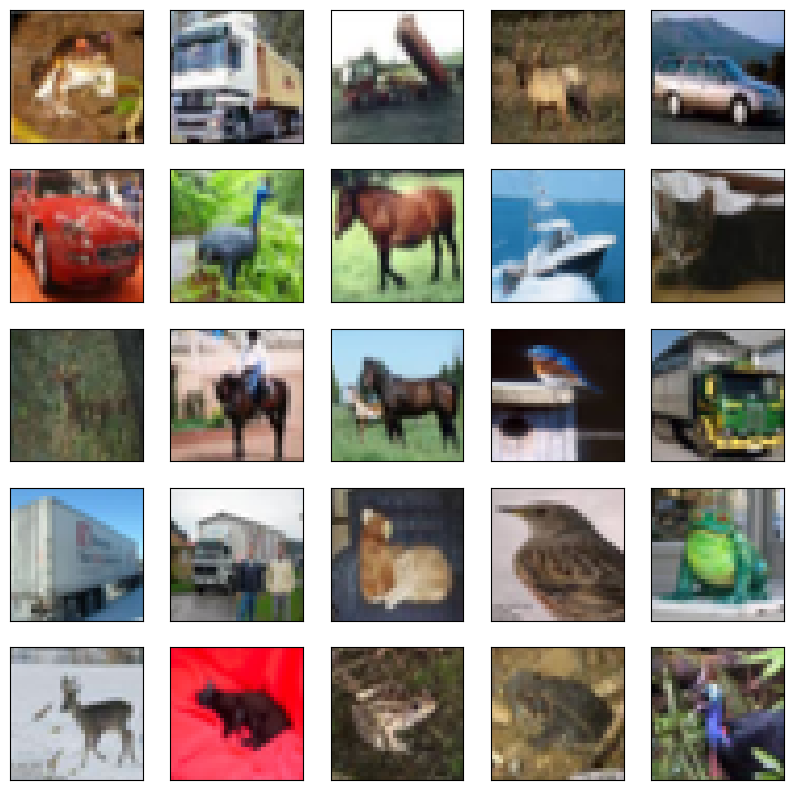

In [180]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])


In [181]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [182]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [183]:
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [185]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2787 - loss: 1.9979
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3847 - loss: 1.7335
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4157 - loss: 1.6530
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4388 - loss: 1.5993
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4499 - loss: 1.5577
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4692 - loss: 1.5162
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4721 - loss: 1.5018
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4797 - loss: 1.4786
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4921 - loss: 1.4512
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4927 - loss: 1.4386
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5028 - loss: 1.4249
Epoch 12/100
1

In [186]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5084 - loss: 1.5640
Test accuracy: 0.5034999847412109


In [187]:
predictions = model.predict(x_train)
predictions[2510]

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


array([3.3397012e-04, 3.4678399e-04, 1.4361042e-02, 2.8959194e-01,
       7.1040769e-03, 1.2215130e-01, 5.2902436e-01, 3.6011804e-02,
       1.9606838e-05, 1.0551260e-03], dtype=float32)

In [188]:
np.argmax(predictions[2510])

6

In [189]:
y_train[2510]

array([6], dtype=uint8)

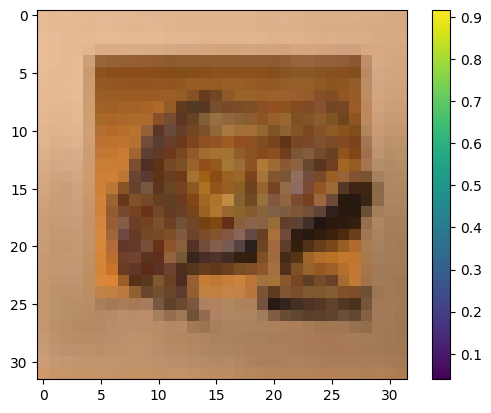

In [190]:
plt.figure()
plt.imshow(x_train[2510])
plt.colorbar()
plt.grid(False)


In [191]:
class_name[np.argmax(predictions[2510])]

'Frogs'